In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Simple QA

serp API

In [4]:
model_names = ["gpt-4o-mini", "gpt-4o", "claude-3.5-sonnet", "gemini-v1.5-flash",
               "gemini-v1.5-pro", "nvidia-llama31-70", "nvidia-llama31-405"]

In [176]:
simple_qa_samples = {}
for model_name in model_names:
    simple_qa_samples[model_name] = pd.read_json("eval_samples/simple_qa_250_{}.jsonl".format(model_name), lines=True)
    simple_qa_samples[model_name+"-agent"] = pd.read_json("eval_samples/simple_qa_250_{}-agent.jsonl".format(model_name), lines=True)

simple_qa_samples["gemini-v1.5-flash-agent"] = pd.read_json("eval_samples/simple_qa_250-gemini-v1.5-flash-agent-ablation.jsonl", lines=True)
simple_qa_samples["ppl-llama31-70-agent"] = pd.read_json("eval_samples/simple_qa_250_llama-3.1-sonar-large-128k-online.jsonl", lines=True)
simple_qa_samples["ppl-llama31-405-agent"] = pd.read_json("eval_samples/simple_qa_250_llama-3.1-sonar-huge-128k-online.jsonl", lines=True)

In [177]:
web_search_invoked = {}
for model_name in simple_qa_samples.keys():
    if 'agent' in model_name:
        web_search_invoked[model_name] = float((simple_qa_samples[model_name]["search_done"]).mean())
web_search_invoked

{'gpt-4o-mini-agent': 0.784,
 'gpt-4o-agent': 0.78,
 'claude-3.5-sonnet-agent': 0.952,
 'gemini-v1.5-flash-agent': 0.628,
 'gemini-v1.5-pro-agent': 0.876,
 'nvidia-llama31-70-agent': 0.624,
 'nvidia-llama31-405-agent': 0.264,
 'ppl-llama31-70-agent': 0.908,
 'ppl-llama31-405-agent': 0.892}

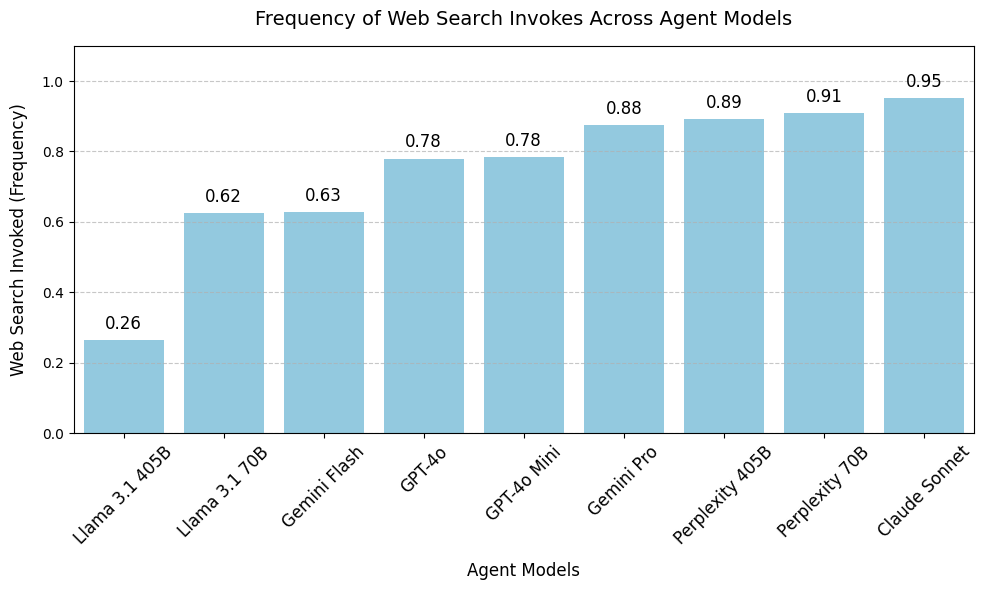

In [178]:
display_names = {"gpt-4o-mini-agent": "GPT-4o Mini", "gpt-4o-agent": "GPT-4o", "claude-3.5-sonnet-agent": "Claude Sonnet",
                "gemini-v1.5-flash-agent": "Gemini Flash", "gemini-v1.5-pro-agent": "Gemini Pro",
                "nvidia-llama31-70-agent": "Llama 3.1 70B", "nvidia-llama31-405-agent": "Llama 3.1 405B",
                "gemini-v1.5-flash-agent": "Gemini Flash", "ppl-llama31-70-agent": "Perplexity 70B",
                "ppl-llama31-405-agent": "Perplexity 405B"}

plot_data = pd.DataFrame(web_search_invoked.items(), columns=["Model", "Web Search Invoked"])
plot_data["Model"] = plot_data["Model"].map(display_names)
plot_data = plot_data.sort_values(by="Web Search Invoked", ascending=True).reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Web Search Invoked", data=plot_data, color="skyblue")

for index, row in plot_data.iterrows():
    plt.text(x=index, 
             y=row["Web Search Invoked"] + 0.02,
             s=f'{row["Web Search Invoked"]:.2f}',
             ha='center', va='bottom', 
             fontsize=12, color='black')

plt.xlabel("Agent Models", fontsize=12, labelpad=10)
plt.ylabel("Web Search Invoked (Frequency)", fontsize=12, labelpad=10)
plt.xticks(rotation=45, fontsize=12)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Frequency of Web Search Invokes Across Agent Models", fontsize=14, pad=15)
plt.tight_layout()
plt.show()

In [179]:
simple_qa_results = {}
for model_name in model_names:
    simple_qa_results[model_name] = pd.read_json("eval_results/simple_qa_250_{}_results.jsonl".format(model_name), lines=True)
    simple_qa_results[model_name+"-agent"] = pd.read_json("eval_results/simple_qa_250_{}-agent_results.jsonl".format(model_name), lines=True)

simple_qa_results["ppl-llama31-70-agent"] = pd.read_json("eval_results/simple_qa_250_llama-3.1-sonar-large-128k-online_results.jsonl", lines=True)
simple_qa_results["ppl-llama31-405-agent"] = pd.read_json("eval_results/simple_qa_250_llama-3.1-sonar-huge-128k-online_results.jsonl", lines=True)
simple_qa_results["gemini-v1.5-flash-agent"] = pd.read_json("eval_results/simple_qa_250-gemini-v1.5-flash-agent-ablation_results.jsonl", lines=True)

accuracy = {}
for model_name in simple_qa_results.keys():
    model_accuracy = float((simple_qa_results[model_name]["grade"] == "A").mean())
    accuracy[model_name] = model_accuracy
accuracy

{'gpt-4o-mini': 0.1,
 'gpt-4o-mini-agent': 0.588,
 'gpt-4o': 0.44,
 'gpt-4o-agent': 0.72,
 'claude-3.5-sonnet': 0.3,
 'claude-3.5-sonnet-agent': 0.78,
 'gemini-v1.5-flash': 0.112,
 'gemini-v1.5-flash-agent': 0.4,
 'gemini-v1.5-pro': 0.284,
 'gemini-v1.5-pro-agent': 0.708,
 'nvidia-llama31-70': 0.152,
 'nvidia-llama31-70-agent': 0.488,
 'nvidia-llama31-405': 0.188,
 'nvidia-llama31-405-agent': 0.436,
 'ppl-llama31-70-agent': 0.172,
 'ppl-llama31-405-agent': 0.208}

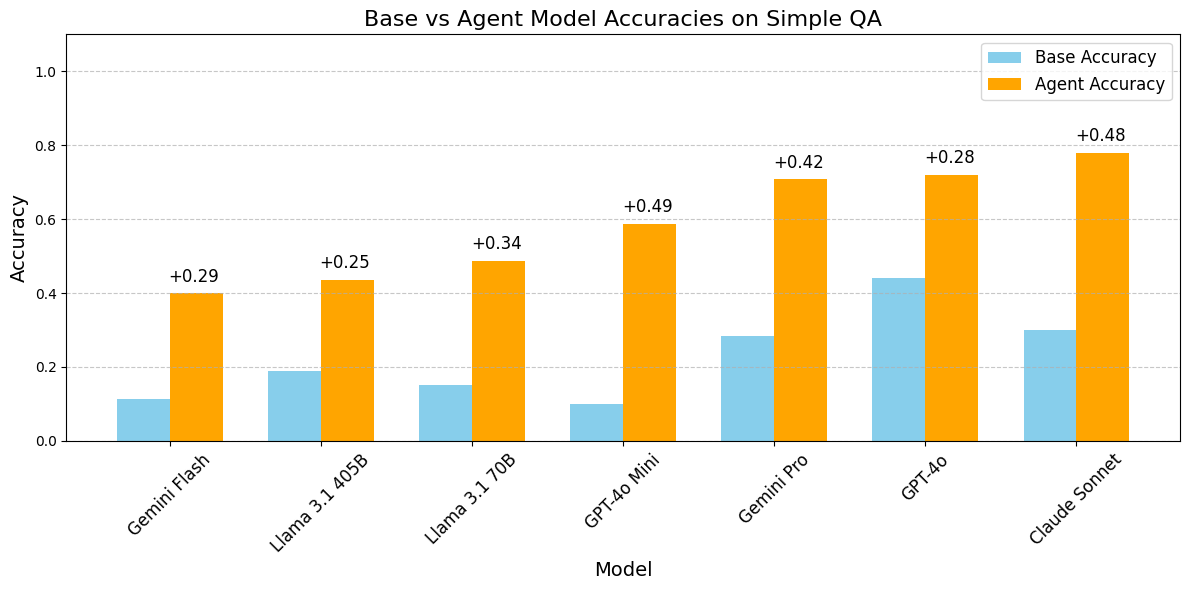

In [180]:
display_names = {"gpt-4o-mini-agent": "GPT-4o Mini", "gpt-4o-agent": "GPT-4o", "claude-3.5-sonnet-agent": "Claude Sonnet",
                "gemini-v1.5-flash-agent": "Gemini Flash", "gemini-v1.5-pro-agent": "Gemini Pro",
                "nvidia-llama31-70-agent": "Llama 3.1 70B", "nvidia-llama31-405-agent": "Llama 3.1 405B",
                "gemini-v1.5-flash-agent": "Gemini Flash", "ppl-llama31-70-agent": "Perplexity 70B",
                "ppl-llama31-405-agent": "Perplexity 405B"}

models = []
base_accuracies = []
agent_accuracies = []
improvements = []

for key in accuracy:
    if '-agent' in key and 'ppl' not in key:
        base_key = key.replace('-agent', '')
        models.append(display_names[key])
        base_accuracies.append(accuracy[base_key])
        agent_accuracies.append(accuracy[key])
        improvements.append(accuracy[key] - accuracy[base_key])

plot_data = pd.DataFrame({
    "Model": models,
    "Base Accuracy": base_accuracies,
    "Agent Accuracy": agent_accuracies,
    "Improvement": improvements
})
plot_data = plot_data.sort_values(by="Agent Accuracy", ascending=True).reset_index(drop=True)

x = np.arange(len(plot_data["Model"]))
width = 0.35
plt.figure(figsize=(12, 6))

base_bars = plt.bar(x - width / 2, plot_data["Base Accuracy"], width, label="Base Accuracy", color="skyblue")
agent_bars = plt.bar(x + width / 2, plot_data["Agent Accuracy"], width, label="Agent Accuracy", color="orange")

for i in range(len(models)):
    plt.text(x[i] + 0.16, 
             max(plot_data["Base Accuracy"][i], plot_data["Agent Accuracy"][i]) + 0.02,
             f'+{plot_data["Improvement"][i]:.2f}', 
             ha='center', va='bottom', fontsize=12)

plt.xlabel("Model", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Base vs Agent Model Accuracies on Simple QA", fontsize=16)
plt.xticks(x, plot_data["Model"], rotation=45, fontsize=12)
plt.ylim(0, 1.1)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

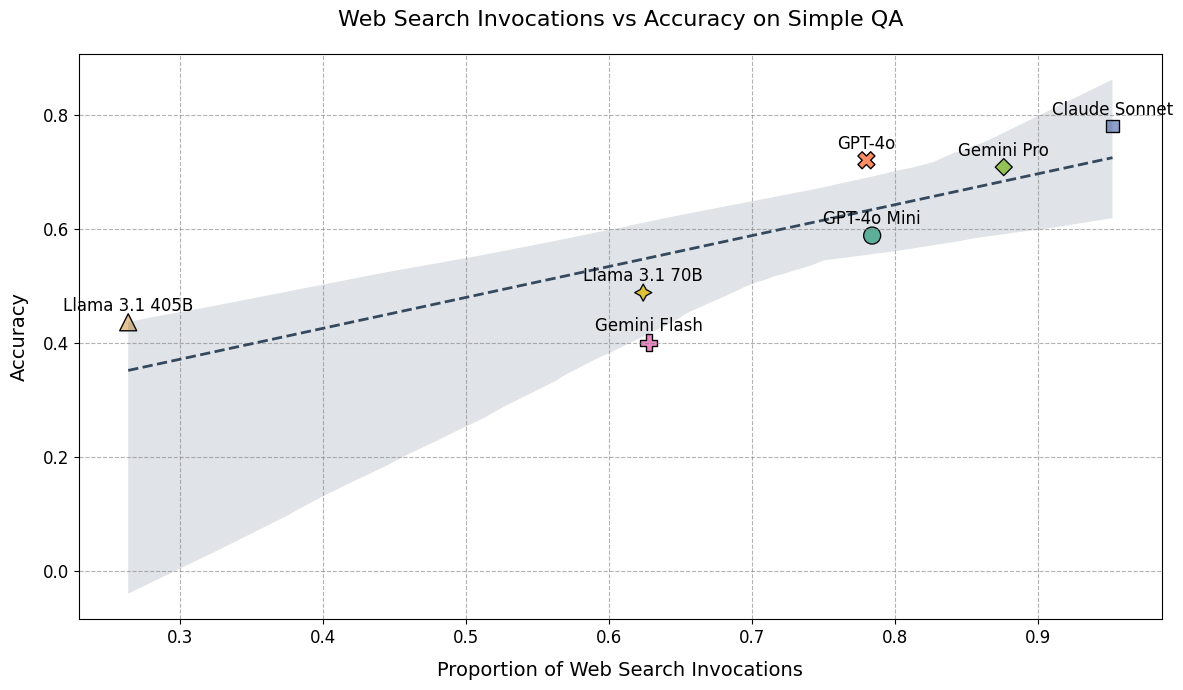

In [183]:
display_names = {"gpt-4o-mini-agent": "GPT-4o Mini", "gpt-4o-agent": "GPT-4o", "claude-3.5-sonnet-agent": "Claude Sonnet",
                "gemini-v1.5-flash-agent": "Gemini Flash", "gemini-v1.5-pro-agent": "Gemini Pro",
                "nvidia-llama31-70-agent": "Llama 3.1 70B", "nvidia-llama31-405-agent": "Llama 3.1 405B",
                "gemini-v1.5-flash-agent": "Gemini Flash", "ppl-llama31-70-agent": "Perplexity 70B",
                "ppl-llama31-405-agent": "Perplexity 405B"}

web_search_invoked_df = pd.DataFrame(web_search_invoked.items(), columns=["Model", "Web Search Invoked"])
simple_qa_accuracy_df = pd.DataFrame(accuracy.items(), columns=["Model", "Accuracy"])
plot_data = pd.merge(web_search_invoked_df, simple_qa_accuracy_df, on="Model")
plot_data = plot_data[~plot_data["Model"].str.contains("ppl-llama31")]
plot_data["Model"] = plot_data["Model"].map(display_names)

plt.figure(figsize=(12, 7))

scatter = sns.scatterplot(
    x="Web Search Invoked",
    y="Accuracy",
    data=plot_data,
    hue="Model",
    style="Model",
    palette="Set2",
    s=150,
    edgecolor="black"
)

sns.regplot(
    x="Web Search Invoked",
    y="Accuracy",
    data=plot_data,
    scatter=False,
    color="#34495e",
    line_kws={"linestyle": "dashed", "linewidth": 2}
)

for i in range(len(plot_data)):
    plt.text(
        plot_data["Web Search Invoked"].iloc[i],
        plot_data["Accuracy"].iloc[i] + 0.02,
        plot_data["Model"].iloc[i],
        fontsize=12,
        ha="center"
    )

plt.title("Web Search Invocations vs Accuracy on Simple QA", fontsize=16, pad=20)
plt.xlabel("Proportion of Web Search Invocations", fontsize=14, labelpad=10)
plt.ylabel("Accuracy", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="both", linestyle="--", alpha=0.6, color="gray")
plt.legend().set_visible(False)
plt.tight_layout()

plt.show()

In [184]:
prop_corrections = {}

for model in simple_qa_results.keys():
    if 'agent' in model:
        continue
    model_results = simple_qa_results[model]
    agent_model_results = simple_qa_results[model+"-agent"]
    base_incorrect_indices = model_results[model_results["grade"] != "A"].index
    model_results = model_results.loc[base_incorrect_indices]
    agent_model_results = agent_model_results.loc[base_incorrect_indices]
    num_correct_agent = (agent_model_results["grade"] == "A").sum()
    num_incorrect_base = len(base_incorrect_indices)
    prop_corrections[model] = float(num_correct_agent / num_incorrect_base)

prop_corrections

{'gpt-4o-mini': 0.5911111111111111,
 'gpt-4o': 0.6785714285714286,
 'claude-3.5-sonnet': 0.7714285714285715,
 'gemini-v1.5-flash': 0.40540540540540543,
 'gemini-v1.5-pro': 0.7206703910614525,
 'nvidia-llama31-70': 0.46226415094339623,
 'nvidia-llama31-405': 0.3793103448275862}

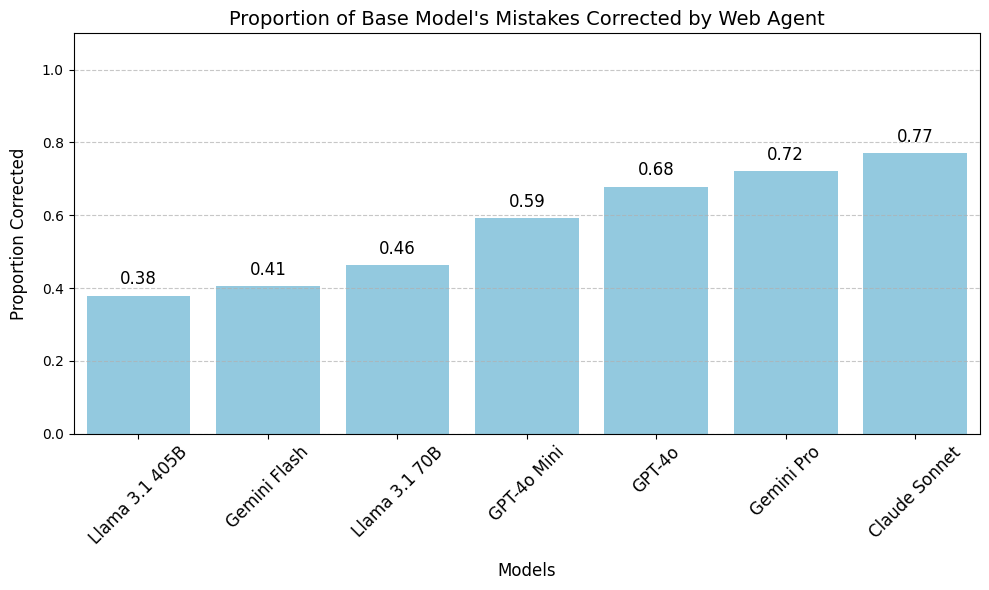

In [185]:
display_names = {"gpt-4o-mini": "GPT-4o Mini", "gpt-4o": "GPT-4o", "claude-3.5-sonnet": "Claude Sonnet",
                "gemini-v1.5-flash": "Gemini Flash", "gemini-v1.5-pro": "Gemini Pro",
                "nvidia-llama31-70": "Llama 3.1 70B", "nvidia-llama31-405": "Llama 3.1 405B",
                "gemini-v1.5-flash": "Gemini Flash"}

plot_data = pd.DataFrame(prop_corrections.items(), columns=["Model", "Proportion Corrected"])
plot_data["Model"] = plot_data["Model"].map(display_names)
plot_data = plot_data.sort_values(by="Proportion Corrected", ascending=True).reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Proportion Corrected", data=plot_data, color="skyblue")

for index, row in plot_data.iterrows():
    plt.text(x=index, 
             y=row["Proportion Corrected"] + 0.02,
             s=f'{row["Proportion Corrected"]:.2f}',
             ha='center', va='bottom', 
             fontsize=12, color='black')

plt.xlabel("Models", fontsize=12, labelpad=10)
plt.ylabel("Proportion Corrected", fontsize=12, labelpad=10)
plt.xticks(rotation=45, fontsize=12)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Proportion of Base Model's Mistakes Corrected by Web Agent", fontsize=14)
plt.tight_layout()
plt.show()

In [211]:
simple_qa = pd.read_json("eval_inputs/simple_qa_250.jsonl", lines=True)

claude_base_results = simple_qa_results["claude-3.5-sonnet"]
claude_base_samples = simple_qa_samples["claude-3.5-sonnet"]
claude_agent_results = simple_qa_results["claude-3.5-sonnet-agent"]
claude_agent_samples = simple_qa_samples["claude-3.5-sonnet-agent"]

claude_base_results = pd.merge(claude_base_results, claude_base_samples, on="question_id")
claude_base_results = pd.merge(claude_base_results, simple_qa, on="question_id")
claude_agent_results = pd.merge(claude_agent_results, claude_agent_samples, on="question_id")
claude_agent_results = pd.merge(claude_agent_results, simple_qa, on="question_id")

base_incorrect_indices = claude_base_results[claude_base_results["grade"] != "A"]['question_id']
claude_base_results = claude_base_results.loc[claude_base_results["question_id"].isin(base_incorrect_indices)]
claude_agent_results = claude_agent_results.loc[claude_agent_results["question_id"].isin(base_incorrect_indices)]
agent_correct_indices = claude_agent_results[claude_agent_results["grade"] == "A"].index

sample_point = claude_agent_results.loc[int(np.random.choice(agent_correct_indices)), "question_id"]
sample_point = "simple_qa_103"
print("Question ID: {}".format(sample_point))
print("### Question:\n{}\n".format(claude_base_results[claude_base_results["question_id"]==sample_point].iloc[0]['prompt']))
print("### Ground Truth Answer:\n{}\n".format(claude_base_results[claude_base_results["question_id"]==sample_point].iloc[0]['label']))
print("### Base Model Answer:\n{}\n".format(claude_base_results[claude_base_results["question_id"]==sample_point].iloc[0]['response']))
print("### Agent Model Answer:\n{}\n".format(claude_agent_results[claude_agent_results["question_id"]==sample_point].iloc[0]['response']))

Question ID: simple_qa_103
### Question:
What is the chemical name of the drug previously known to treat bacterial infections that Dr. William Schwartz discovered also acts as a diuretic in people with congestive heart failure?

### Ground Truth Answer:
Sulfanilamide.

### Base Model Answer:
Chlorothiazide (marketed as Diuril) was the drug that Dr. William Schwartz discovered had diuretic properties in people with congestive heart failure, despite it originally being developed as an antibacterial medication. This discovery in the late 1950s led to the development of thiazide diuretics, which became an important class of drugs for treating hypertension and heart failure.

### Agent Model Answer:
Based on the provided reference materials, the antibiotic sulfanilamide was discovered by Dr. William Schwartz to increase sodium excretion in patients with heart failure, which led to the development of modern diuretic drugs. This observation was noted in the Wikipedia article about William Sch

In [187]:
prop_incorrections = {}

for model in simple_qa_results.keys():
    if 'agent' in model:
        continue
    model_results = simple_qa_results[model]
    agent_model_results = simple_qa_results[model+"-agent"]
    base_correct_indices = model_results[model_results["grade"] == "A"].index
    model_results = model_results.loc[base_correct_indices]
    agent_model_results = agent_model_results.loc[base_correct_indices]
    num_correct_base = len(base_correct_indices)
    num_incorrect_agent = (agent_model_results["grade"] != "A").sum()
    prop_incorrections[model] = float(num_incorrect_agent / num_correct_base)

prop_incorrections

{'gpt-4o-mini': 0.44,
 'gpt-4o': 0.22727272727272727,
 'claude-3.5-sonnet': 0.2,
 'gemini-v1.5-flash': 0.6428571428571429,
 'gemini-v1.5-pro': 0.323943661971831,
 'nvidia-llama31-70': 0.3684210526315789,
 'nvidia-llama31-405': 0.3191489361702128}

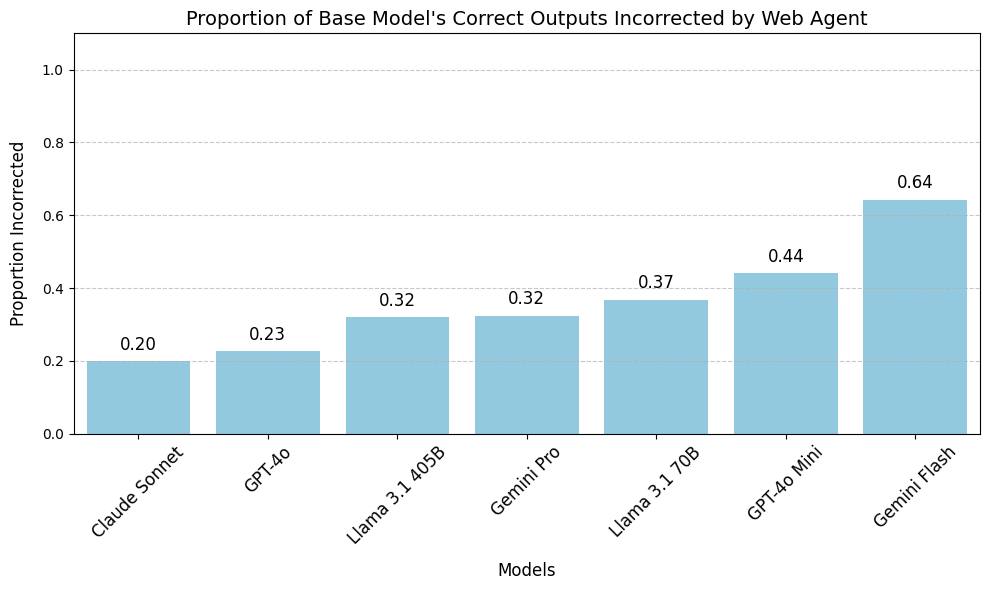

In [188]:
display_names = {"gpt-4o-mini": "GPT-4o Mini", "gpt-4o": "GPT-4o", "claude-3.5-sonnet": "Claude Sonnet",
                "gemini-v1.5-flash": "Gemini Flash", "gemini-v1.5-pro": "Gemini Pro",
                "nvidia-llama31-70": "Llama 3.1 70B", "nvidia-llama31-405": "Llama 3.1 405B",
                "gemini-v1.5-flash": "Gemini Flash"}

plot_data = pd.DataFrame(prop_incorrections.items(), columns=["Model", "Proportion Incorrected"])
plot_data["Model"] = plot_data["Model"].map(display_names)
plot_data = plot_data.sort_values(by="Proportion Incorrected", ascending=True).reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Proportion Incorrected", data=plot_data, color="skyblue")

for index, row in plot_data.iterrows():
    plt.text(x=index, 
             y=row["Proportion Incorrected"] + 0.02,
             s=f'{row["Proportion Incorrected"]:.2f}',
             ha='center', va='bottom', 
             fontsize=12, color='black')

plt.xlabel("Models", fontsize=12, labelpad=10)
plt.ylabel("Proportion Incorrected", fontsize=12, labelpad=10)
plt.xticks(rotation=45, fontsize=12)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Proportion of Base Model's Correct Outputs Incorrected by Web Agent", fontsize=14)
plt.tight_layout()
plt.show()

In [192]:
simple_qa = pd.read_json("eval_inputs/simple_qa_250.jsonl", lines=True)

gemini_base_results = simple_qa_results["gemini-v1.5-flash"]
gemini_base_samples = simple_qa_samples["gemini-v1.5-flash"]
gemini_agent_results = simple_qa_results["gemini-v1.5-flash-agent"]
gemini_agent_samples = simple_qa_samples["gemini-v1.5-flash-agent"]

gemini_base_results = pd.merge(gemini_base_results, gemini_base_samples, on="question_id")
gemini_base_results = pd.merge(gemini_base_results, simple_qa, on="question_id")
gemini_agent_results = pd.merge(gemini_agent_results, gemini_agent_samples, on="question_id")
gemini_agent_results = pd.merge(gemini_agent_results, simple_qa, on="question_id")

base_correct_indices = gemini_base_results[gemini_base_results["grade"] == "A"].index
gemini_base_results = gemini_base_results.loc[base_correct_indices]
gemini_agent_results = gemini_agent_results.loc[base_correct_indices]
agent_incorrect_indices = gemini_agent_results[gemini_agent_results["grade"] != "A"].index

sample_point = int(np.random.choice(agent_incorrect_indices))
sample_point = 227
print("Index: {} ({})".format(sample_point, gemini_base_results.loc[sample_point]['question_id']))
print("### Question:\n{}\n".format(gemini_base_results.loc[sample_point]['prompt']))
print("### Ground Truth Answer:\n{}\n".format(gemini_base_results.loc[sample_point]['label']))
print("### Base Model Answer:\n{}\n".format(gemini_base_results.loc[sample_point]['response']))
print("### Agent Model Answer:\n{}\n".format(gemini_agent_results.loc[sample_point]['response']))

Index: 227 (simple_qa_227)
### Question:
At what zoo did August Scherl demonstrate his gyro-monorail to the public?

### Ground Truth Answer:
Berlin Zoological Gardens

### Base Model Answer:
August Scherl demonstrated his gyro-monorail to the public at the **Berlin Zoological Garden**.

### Agent Model Answer:
I cannot directly answer your question about the accuracy of Le Chatelier's thermoelectric pyrometer as reported in the 1900 document "Clays of New York, Their Properties and Uses" because I do not have access to the internet or specific files to perform a web search.  The provided `web_search` function is not functional without access to an external API.




In [222]:
simple_qa = pd.read_json("eval_inputs/simple_qa_250.jsonl", lines=True)

gemini_base_results = simple_qa_results["gpt-4o-mini"]
gemini_base_samples = simple_qa_samples["gpt-4o-mini"]
gemini_agent_results = simple_qa_results["gpt-4o-mini-agent"]
gemini_agent_samples = simple_qa_samples["gpt-4o-mini-agent"]

gemini_base_results = pd.merge(gemini_base_results, gemini_base_samples, on="question_id")
gemini_base_results = pd.merge(gemini_base_results, simple_qa, on="question_id")
gemini_agent_results = pd.merge(gemini_agent_results, gemini_agent_samples, on="question_id")
gemini_agent_results = pd.merge(gemini_agent_results, simple_qa, on="question_id")

base_correct_indices = gemini_base_results[gemini_base_results["grade"] == "A"]['question_id']
gemini_base_results = gemini_base_results.loc[gemini_base_results['question_id'].isin(base_correct_indices)]
gemini_agent_results = gemini_agent_results.loc[gemini_agent_results['question_id'].isin(base_correct_indices)]
agent_incorrect_indices = gemini_agent_results[gemini_agent_results["grade"] != "A"].index

sample_point = gemini_agent_results.loc[int(np.random.choice(agent_incorrect_indices)), "question_id"]
print("Index: {}".format(sample_point))
print("### Question:\n{}\n".format(gemini_base_results[gemini_base_results["question_id"]==sample_point].iloc[0]['prompt']))
print("### Ground Truth Answer:\n{}\n".format(gemini_base_results[gemini_base_results["question_id"]==sample_point].iloc[0]['label']))
print("### Base Model Answer:\n{}\n".format(gemini_base_results[gemini_base_results["question_id"]==sample_point].iloc[0]['response']))
print("### Agent Model Answer:\n{}\n".format(gemini_agent_results[gemini_agent_results["question_id"]==sample_point].iloc[0]['response']))

Index: simple_qa_65
### Question:
What were the month and year when WhatsApp announced updated plans to roll out a Communities feature allowing several group chats to exist in a shared space, getting unified notifications, and opening up smaller discussion groups?

### Ground Truth Answer:
April 2022

### Base Model Answer:
WhatsApp announced updated plans to roll out the Communities feature in April 2022.

### Agent Model Answer:
WhatsApp announced the rollout of its Communities feature on **November 3, 2022**. This feature allows users to connect multiple group chats under one umbrella, facilitating unified notifications and the creation of smaller discussion groups.
Reference Website: 

- [WhatsApp makes big announcement! Communities feature now rolling out - BusinessToday](https://www.businesstoday.in/technology/news/story/whatsapp-makes-big-announcement-communities-feature-now-rolling-out-351687-2022-11-03)



In [228]:
simple_qa_results_serp = {}

for model_name in ["gpt-4o", "gpt-4o-mini"]:
    simple_qa_results_serp[model_name] = pd.read_json("eval_results/simple_qa_250_{}_results.jsonl".format(model_name), lines=True)
    simple_qa_results_serp[model_name+"-you-agent"] = pd.read_json("eval_results/simple_qa_250_{}-agent_results.jsonl".format(model_name), lines=True)
    simple_qa_results_serp[model_name+"-serp-agent"] = pd.read_json("eval_results/simple_qa_250_{}-agent_serp_results.jsonl".format(model_name), lines=True)

In [229]:
accuracy_serp = {}

for model_name in simple_qa_results_serp.keys():
    model_accuracy = float((simple_qa_results_serp[model_name]["grade"] == "A").mean())
    accuracy_serp[model_name] = model_accuracy
accuracy_serp

{'gpt-4o': 0.44,
 'gpt-4o-you-agent': 0.72,
 'gpt-4o-serp-agent': 0.704,
 'gpt-4o-mini': 0.1,
 'gpt-4o-mini-you-agent': 0.588,
 'gpt-4o-mini-serp-agent': 0.564}

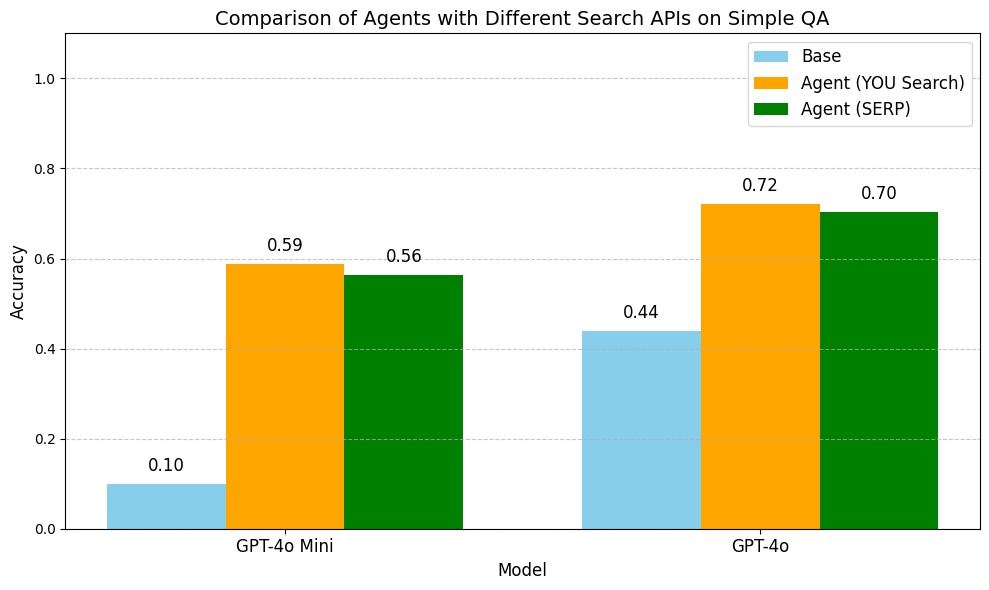

In [240]:
display_names = {"gpt-4o-mini": "GPT-4o Mini", "gpt-4o": "GPT-4o"}

models = ["gpt-4o-mini", "gpt-4o"]
base_accuracies = [accuracy_serp[model] for model in models]
you_agent_accuracies = [accuracy_serp[f"{model}-you-agent"] for model in models]
serp_agent_accuracies = [accuracy_serp[f"{model}-serp-agent"] for model in models]

plot_data = pd.DataFrame({
    "Model": models,
    "Base": base_accuracies,
    "You Agent": you_agent_accuracies,
    "Serp Agent": serp_agent_accuracies
})
plot_data["Model"] = plot_data["Model"].map(display_names)

x = np.arange(len(models))
width = 0.25
plt.figure(figsize=(10, 6))
base_bars = plt.bar(x - width, plot_data["Base"], width, label="Base", color="skyblue")
you_agent_bars = plt.bar(x, plot_data["You Agent"], width, label="Agent (YOU Search)", color="orange")
serp_agent_bars = plt.bar(x + width, plot_data["Serp Agent"], width, label="Agent (SERP)", color="green")

for i in range(len(models)):
    plt.text(x[i] - width, plot_data["Base"][i] + 0.02, f'{plot_data["Base"][i]:.2f}', ha='center', va='bottom', fontsize=12)
    plt.text(x[i], plot_data["You Agent"][i] + 0.02, f'{plot_data["You Agent"][i]:.2f}', ha='center', va='bottom', fontsize=12)
    plt.text(x[i] + width, plot_data["Serp Agent"][i] + 0.02, f'{plot_data["Serp Agent"][i]:.2f}', ha='center', va='bottom', fontsize=12)

plt.title("Comparison of Agents with Different Search APIs on Simple QA", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(x, plot_data["Model"], fontsize=12)
plt.ylim(0, 1.1)
plt.legend(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

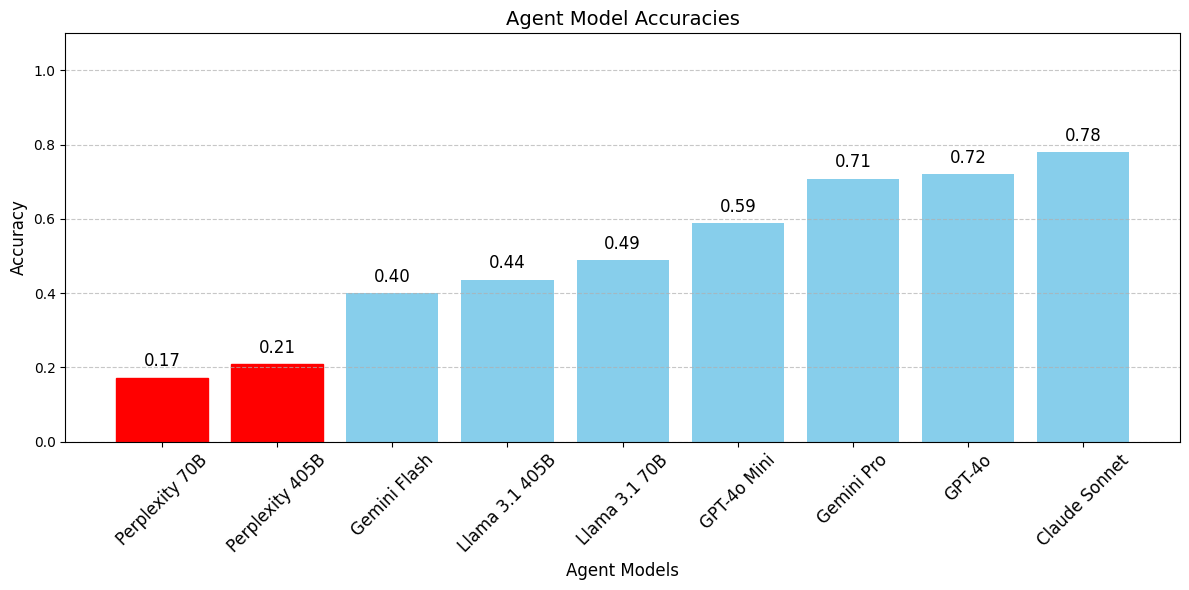

In [251]:
display_names = {"gpt-4o-mini-agent": "GPT-4o Mini", "gpt-4o-agent": "GPT-4o", "claude-3.5-sonnet-agent": "Claude Sonnet",
                "gemini-v1.5-flash-agent": "Gemini Flash", "gemini-v1.5-pro-agent": "Gemini Pro",
                "nvidia-llama31-70-agent": "Llama 3.1 70B", "nvidia-llama31-405-agent": "Llama 3.1 405B",
                "gemini-v1.5-flash-agent": "Gemini Flash", "ppl-llama31-70-agent": "Perplexity 70B",
                "ppl-llama31-405-agent": "Perplexity 405B"}

agent_data = {key: value for key, value in accuracy.items() if '-agent' in key}
plot_data = pd.DataFrame(list(agent_data.items()), columns=["Model", "Accuracy"])
plot_data["Model"] = plot_data["Model"].map(display_names)
plot_data = plot_data.sort_values(by="Accuracy", ascending=True).reset_index(drop=True)

plt.figure(figsize=(12, 6))
bars = plt.bar(plot_data["Model"], plot_data["Accuracy"], color="skyblue")

for i, bar in enumerate(bars):
    if i < 2:
        bar.set_color('red')

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{bar.get_height():.2f}', 
             ha='center', va='bottom', fontsize=12)

plt.title("Agent Model Accuracies", fontsize=14)
plt.xlabel("Agent Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.ylim(0, 1.1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [252]:
simple_qa_results.keys()

dict_keys(['gpt-4o-mini', 'gpt-4o-mini-agent', 'gpt-4o', 'gpt-4o-agent', 'claude-3.5-sonnet', 'claude-3.5-sonnet-agent', 'gemini-v1.5-flash', 'gemini-v1.5-flash-agent', 'gemini-v1.5-pro', 'gemini-v1.5-pro-agent', 'nvidia-llama31-70', 'nvidia-llama31-70-agent', 'nvidia-llama31-405', 'nvidia-llama31-405-agent', 'ppl-llama31-70-agent', 'ppl-llama31-405-agent'])

In [262]:
simple_qa = pd.read_json("eval_inputs/simple_qa_250.jsonl", lines=True)

llama_405_results = simple_qa_results["nvidia-llama31-405-agent"]
llama_405_samples = simple_qa_samples["nvidia-llama31-405-agent"]
ppl_405_results = simple_qa_results["ppl-llama31-405-agent"]
ppl_405_samples = simple_qa_samples["ppl-llama31-405-agent"]

llama_405_results = pd.merge(llama_405_results, llama_405_samples, on="question_id")
llama_405_results = pd.merge(llama_405_results, simple_qa, on="question_id")
ppl_405_results = pd.merge(ppl_405_results, ppl_405_samples, on="question_id")
ppl_405_results = pd.merge(ppl_405_results, simple_qa, on="question_id")

ppl_incorrect_indices = ppl_405_results[ppl_405_results["grade"] != "A"]["question_id"]
ppl_405_results = ppl_405_results.loc[ppl_405_results["question_id"].isin(ppl_incorrect_indices)]
llama_405_results = llama_405_results.loc[llama_405_results["question_id"].isin(ppl_incorrect_indices)]
llama_correct_indices = llama_405_results[llama_405_results["grade"] == "A"]["question_id"]

sample_point = llama_correct_indices.sample(1).iloc[0]

print("Index: {}".format(sample_point))
print("### Question:\n{}\n".format(llama_405_results[llama_405_results["question_id"]==sample_point].iloc[0]['prompt']))
print("### Ground Truth Answer:\n{}\n".format(llama_405_results[llama_405_results["question_id"]==sample_point].iloc[0]['label']))
print("### Llama Model Answer:\n{}\n".format(llama_405_results[llama_405_results["question_id"]==sample_point].iloc[0]['response']))
print("### Perplexity Model Answer:\n{}\n".format(ppl_405_results[ppl_405_results["question_id"]==sample_point].iloc[0]['response']))

Index: simple_qa_4
### Question:
Who kills Daryl Garrs in Happy Valley?

### Ground Truth Answer:
Alison Garrs

### Llama Model Answer:
Daryl Garrs is killed by his mother, Alison Garrs, who shoots him in the back of the head to prevent him from going to prison for murder.
Reference Website: 

- [Alison Garrs | Happy Valley Wikia | Fandom](https://happy-valley.fandom.com/wiki/Alison_Garrs)

### Perplexity Model Answer:
The information provided in the search results does not specify who kills Daryl Garrs in Happy Valley. The mention of Daryl Garrs is found in [1], which only mentions that Daryl is a murderer from series two and that Catherine borrowed a car belonging to his mother, Alison Garrs (played by Susan Lynch), but it does not provide details about Daryl's death. For accurate information on Daryl Garrs' death, additional sources or specific episodes of Happy Valley would need to be consulted.
Reference Website: 

- https://www.imdb.com/name/nm0528462/news/
- https://parade.com/c